___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [99]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [100]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [101]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [102]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_14927/234476302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['Age'], bins=30, kde=False)


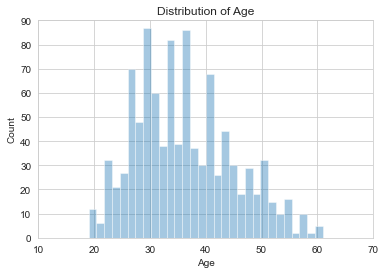

In [103]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xlim(10, 70)
plt.ylim(0, 90)
plt.show()

**Create a jointplot showing Area Income versus Age.**

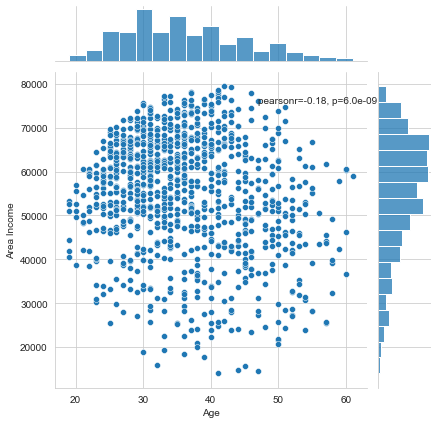

In [104]:
import scipy.stats as stats

sns.set_style('whitegrid')
g = sns.jointplot(x='Age', y='Area Income', data=ad_data)
g.set_axis_labels('Age', 'Area Income')
# g.ax_joint.set(xlim=(10, 70), ylim=(1000, 9000))

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(ad_data['Age'], ad_data['Area Income'])

# Format p-value as scientific notation
p_value_formatted = f"{p_value:.1e}"

# Add correlation coefficient to the plot
g.ax_joint.annotate(f"pearsonr={correlation:.2f}, p={p_value_formatted}", xy=(0.65, 0.9), xycoords='axes fraction')

plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

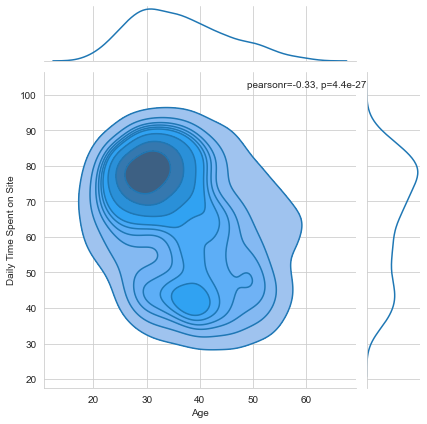

In [105]:
sns.set_style('whitegrid')
g = sns.jointplot(x='Age', y='Daily Time Spent on Site',data=ad_data, kind='kde')
g.plot_joint(sns.kdeplot, fill=True)

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(ad_data['Age'], ad_data['Daily Time Spent on Site'])

# Add correlation coefficient to the plot
g.ax_joint.annotate(f"pearsonr={correlation:.2f}, p={p_value:.1e}", xy=(0.65, 0.95), xycoords='axes fraction')

plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')
plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

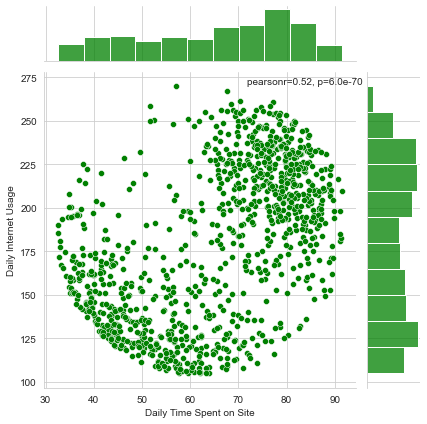

In [106]:
sns.set_style('whitegrid')
g = sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])

# Add correlation coefficient to the plot
g.ax_joint.annotate(f"pearsonr={correlation:.2f}, p={p_value:.1e}", xy=(0.65, 0.96), xycoords='axes fraction')

plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

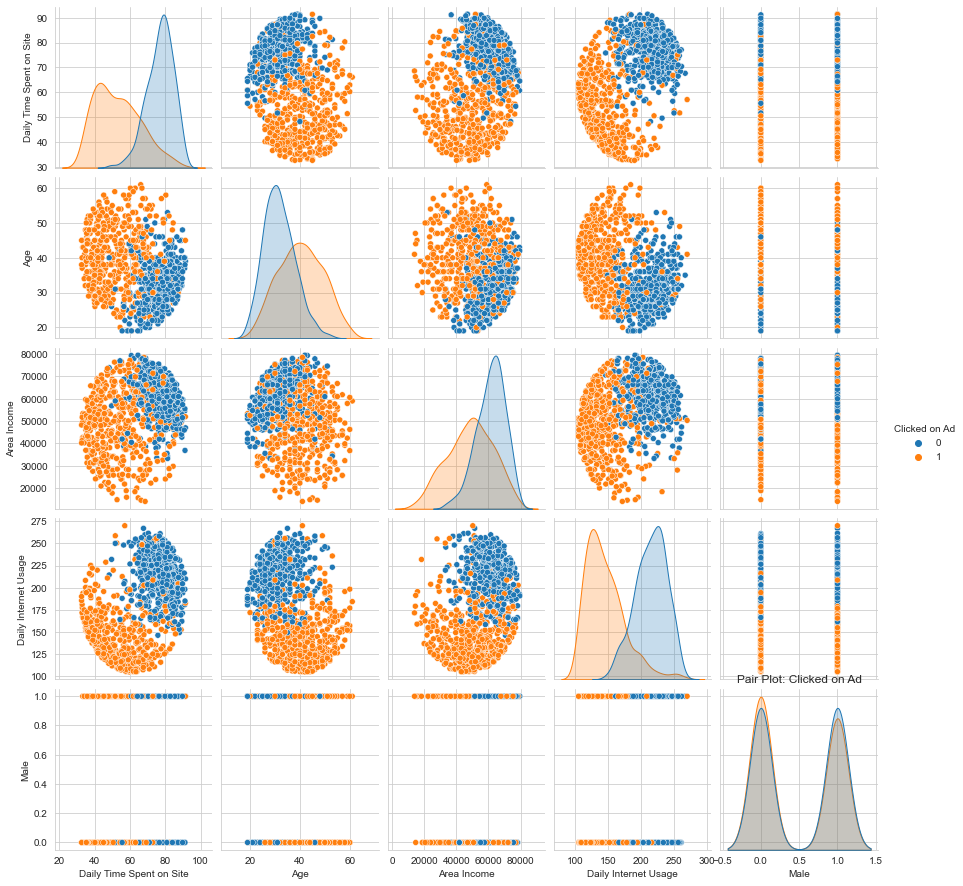

In [107]:
sns.set_style('whitegrid')
pair_grid = sns.pairplot(ad_data, hue='Clicked on Ad')
plt.title('Pair Plot: Clicked on Ad')
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# Select the features (X) and target variable (y)
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature scaling

In [111]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [112]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()

# Train the logistic regression model on the training set
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [113]:
logreg_repr = "LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, \
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', \
random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"

print(logreg_repr)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Output the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


## Predictions and Evaluations
** Now predict values for the testing data.**

In [115]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression()

# Fit the logistic regression model on the training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_scaled)

** Create a Confusion Matrix for the model.**

In [116]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Output the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[ 86   3]
 [  5 106]]



True Positive (TP): 86
False Positive (FP): 3
False Negative (FN): 5
True Negative (TN): 106
Therefore, based on the confusion matrix:

There are 86 instances that were correctly predicted as positive (TP).
There are 3 instances that were incorrectly predicted as positive when they were actually negative (FP).
There are 5 instances that were incorrectly predicted as negative when they were actually positive (FN).
There are 106 instances that were correctly predicted as negative (TN).

## k-Nearest Neighbors

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.925


## random forest classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93


## Great Job!